In [1]:
df=pd.read_csv('D:\\ML Project\\titanic.csv')

<IPython.core.display.Javascript object>

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

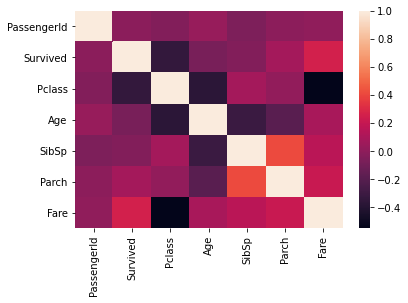

In [6]:
sns.heatmap(df.corr())

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Pclass', ylabel='count'>

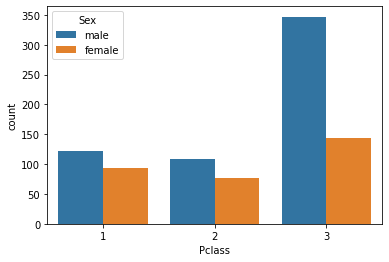

In [7]:
sns.countplot(x='Pclass',hue='Sex',data=df,)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

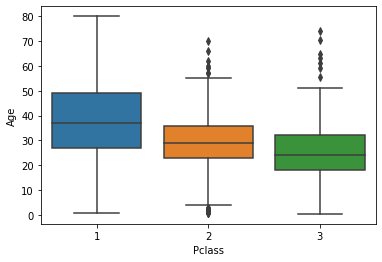

In [8]:
sns.boxplot(x='Pclass',y='Age',data=df)

# Mean/Median/Mode replacement

In [9]:
df = pd.read_csv('D:\\ML Project\\titanic.csv',usecols=['Age','Survived','Fare'])
df.head()

<IPython.core.display.Javascript object>

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [11]:
Age_mean=df.Age.median()

In [12]:
Age_mean

28.0

In [13]:
df['new_age_median']=df['Age'].fillna(Age_mean)

In [14]:
df.head(10)

,Survived,Age,Fare,new_age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


<IPython.core.display.Javascript object>

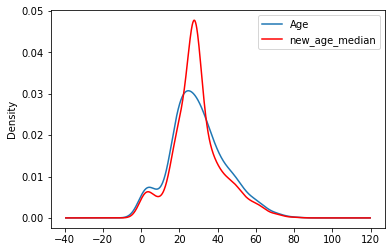

In [15]:
fig= plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.new_age_median.plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# Random Sample Imputation

Aim: Random sample imputation consists of taking observation from he dataset and we use this observation to replace the nan values
when should it be used?It assume that the data are missing completely at random(MCAR)

In [16]:
df['Age'].isnull().sum()

177

In [17]:
#it will have the random sample to fill the na
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [18]:
#pandas need to have same index in order to merge the dataset
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [19]:
df['Age'+'_random']=df['Age']
df

,Survived,Age,Fare,new_age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,NaN
889,1,26.0,30.0000,26.0,26.0


In [20]:
df.loc[df['Age'].isnull(),'Age'+'_random']

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age_random, Length: 177, dtype: float64

In [21]:
df.head(10)

,Survived,Age,Fare,new_age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,NaN
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


In [22]:
def impute_nan(df,variable,median):
    #df[variable+'_median']=df[variable].fillna(Age_mean)
    df[variable+'_random']=df[variable]
    #it will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [23]:
impute_nan(df,'Age',Age_mean)

In [24]:
df.head(10)

,Survived,Age,Fare,new_age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,28.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


<IPython.core.display.Javascript object>

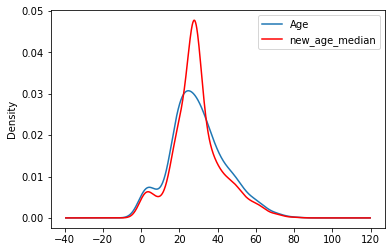

In [25]:
fig= plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.new_age_median.plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

<IPython.core.display.Javascript object>

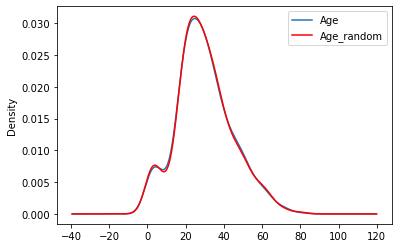

In [26]:
fig= plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

<IPython.core.display.Javascript object>

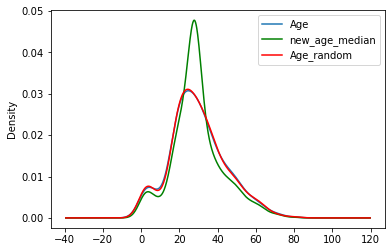

In [27]:
fig= plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.new_age_median.plot(kind='kde',ax=ax,color='green')
df.Age_random.plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# Capturing NAN values with a new feature

### It works well if the data are not missing completely at random

In [28]:
df = pd.read_csv('D:\\ML Project\\titanic.csv',usecols=['Age','Survived','Fare'])
df.head()

<IPython.core.display.Javascript object>

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [29]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [30]:
df['Age_NAN']=np.where(df["Age"].isnull(),1,0)

<IPython.core.display.Javascript object>

In [31]:
df

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [32]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [33]:
df

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


# Advantages
Easy to implement
capture the importance of missing values
### Disadvantages
creating additional feature

# End of distribution imputation

In [34]:
df = pd.read_csv('D:\\ML Project\\titanic.csv',usecols=['Age','Survived','Fare'])
df.head()

<IPython.core.display.Javascript object>

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

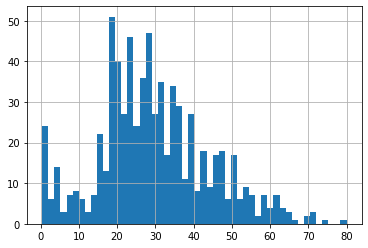

In [35]:
df.Age.hist(bins=50)

In [36]:
df.Age.mean()

29.69911764705882

In [37]:
df.Age.std()

14.526497332334044

In [38]:
df.Age.mean()+ 3*df.Age.std()

73.27860964406095

<IPython.core.display.Javascript object>

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

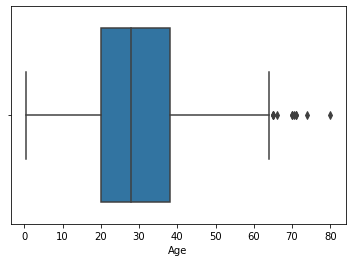

In [39]:
sns.boxplot('Age',data=df)

In [40]:
extrem=df.Age.mean()+3*df.Age.std()

In [41]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [42]:
impute_nan(df,'Age',df.Age.mean(),extrem)

In [43]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.000000,7.2500,22.00000
1,1,38.000000,71.2833,38.00000
2,1,26.000000,7.9250,26.00000
3,1,35.000000,53.1000,35.00000
4,0,35.000000,8.0500,35.00000
5,0,29.699118,8.4583,73.27861
6,0,54.000000,51.8625,54.00000
7,0,2.000000,21.0750,2.00000
8,1,27.000000,11.1333,27.00000
9,1,14.000000,30.0708,14.00000


<AxesSubplot:>

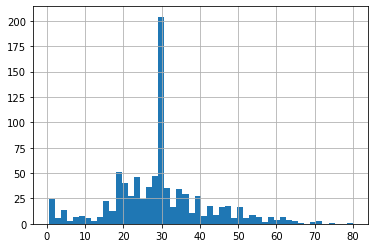

In [44]:
df.Age.hist(bins=50)

<AxesSubplot:>

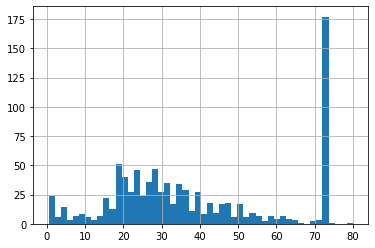

In [45]:
df.Age_end_distribution.hist(bins=50)

<IPython.core.display.Javascript object>

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

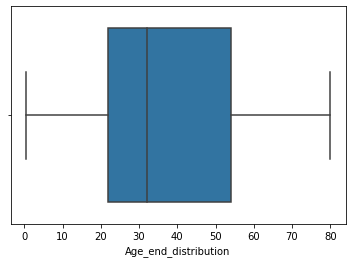

In [46]:
sns.boxplot("Age_end_distribution",data=df)

# Arbitrary valu imputations
it consists of replacing NAN an arbitrary value

In [49]:
df = pd.read_csv('D:\\ML Project\\titanic.csv',usecols=['Age','Fare','Survived'])

<IPython.core.display.Javascript object>

In [50]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [52]:
def impute_nan(df,variable):
    df[variable+'_hundred']=df[variable].fillna(100)

<AxesSubplot:>

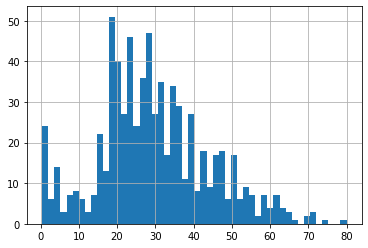

In [57]:
df.Age.hist(bins=50)

In [58]:
impute_nan(df,'Age')

In [56]:
df.head(10)

,Survived,Age,Fare,Age_hundred
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,100.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


# Advantages
capture the importance of missing if there if there is one.
# Disadvantages
Distorts the original distrubution of the variable
hard to decide which value to use